In [5]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



In [25]:
def polynomial(x):
    return 2*x**3 + 4*x**2 + 0.5*x -5


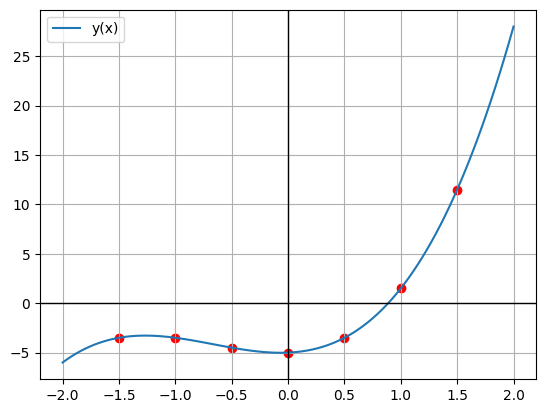

In [26]:
xs = np.linspace(-2, 2, 100)

x_points = np.array([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])

fig, ax = plt.subplots()
coordinate_axes(ax)

ax.plot(xs, polynomial(xs), label='y(x)')
ax.scatter(x_points, polynomial(x_points), color='red')

ax.legend()
ax.grid()

# First Derivative

<Axes: xlabel='x', ylabel='y'>

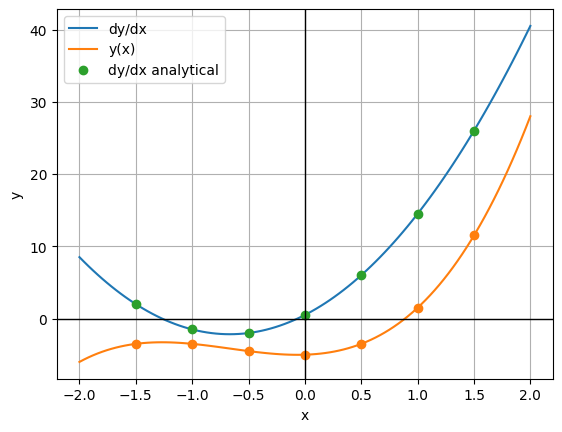

In [57]:
# We need to enable gradients

x_tensor = torch.tensor(xs, requires_grad=True)

y = polynomial(x_tensor)


yps = torch.autograd.grad(y, x_tensor, grad_outputs=torch.ones_like(y), create_graph=True)


yps = yps[0].detach().numpy()
fig, ax = plt.subplots()
coordinate_axes(ax)

ax.plot(xs, yps, label='dy/dx')
ax.plot(xs, polynomial(xs), label='y(x)')

#Points
ax.plot(x_points, polynomial(x_points), 'o',color = 'tab:orange')
ax.plot(x_points, 6*x_points**2 + 8*x_points + 0.5, 'o', label='dy/dx analytical')
ax.grid()
format_axis(ax)



# Second Derivative

<Axes: xlabel='x', ylabel='y'>

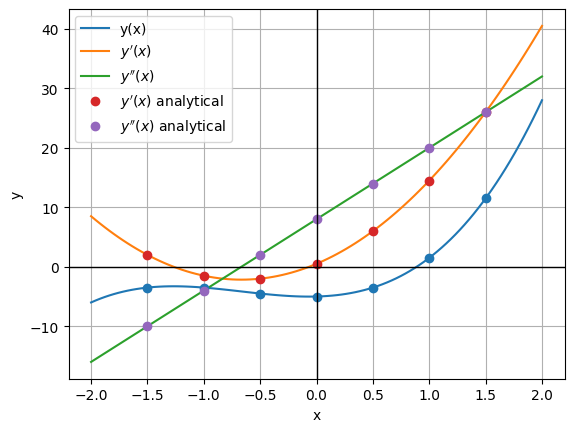

In [84]:
# We need to enable gradients

x_tensor = torch.tensor(xs, requires_grad=True)

y = polynomial(x_tensor)


yps = torch.autograd.grad(y, x_tensor, grad_outputs=torch.ones_like(y), create_graph=True)
yps2 = torch.autograd.grad(yps, x_tensor, grad_outputs=torch.ones_like(y), create_graph=True)


yps = yps[0].detach().numpy()
yps2 = yps2[0].detach().numpy()
fig, ax = plt.subplots()
coordinate_axes(ax)


ax.plot(xs, polynomial(xs), label='y(x)')
ax.plot(xs, yps, label=r'$y^{\prime}(x)$')
ax.plot(xs, yps2, label=r'$y^{\prime \prime} (x)$')


#Points
ax.plot(x_points, polynomial(x_points), 'o',color = 'tab:blue')

ax.plot(x_points, 6*x_points**2 + 8*x_points + 0.5, 'o', label= r'$y^{\prime}(x)$ analytical')
ax.plot(x_points, 12*x_points + 8, 'o', label=r"$y^{\prime \prime} (x)$ analytical")
ax.grid()
format_axis(ax)

